In [151]:
import os
import json
import pandas as pd

# Get the current working directory
current_directory = os.getcwd()

# List of file names
file_names = ['StreamingHistory1.json','StreamingHistory2.json']

# Create a list of file paths by joining the current directory with each file name
file_paths = [os.path.join(current_directory, file_name) for file_name in file_names]

# List to store all data
all_data = []

# Loop through each file
for file_path in file_paths:
    with open(file_path) as f:
        data = json.load(f)
        all_data.extend(data)

df = pd.DataFrame(all_data)

# Explore the combined DataFrame
df.head()

,endTime,artistName,trackName,msPlayed
0,2023-06-01 07:14,Fırat Ağacık,Daha Kaç Çeşit Hoşçakal - Surf Arabesk 1.1,213090
1,2023-06-01 07:18,Cem Karaca,Bu Son Olsun,1170
2,2023-06-01 07:18,KÖFN,Bi' Tek Ben Anlarım,196250
3,2023-06-01 07:18,maNga,Ben Bir Palyaçoyum,36621
4,2023-06-01 07:21,Can Oflaz,Ben Varım,112520


In [159]:
import spotipy
print("hello")
from spotipy.oauth2 import SpotifyClientCredentials
import requests
client_id = 'replace with your own'
client_secret = 'replace with your own'
# Set up the Spotify API client

import requests

def getToken():#getting token
    print("Getting token...")
    url = "https://accounts.spotify.com/api/token"
    headers = {
        "Content-Type": "application/x-www-form-urlencoded"
    }
    data = {
        "grant_type": "client_credentials",
        "client_id": client_id,
        "client_secret": client_secret
    }

    response = requests.post(url, headers=headers, data=data)
    token = response.json()['access_token']
    print("Token is: " + token)
    return "Bearer " + token

def searchArtists(artist_names, token):
    genres_dict = {}
    for artist_name in artist_names:
        artist_name_modified = artist_name.replace(' ', '+')
        url = 'https://api.spotify.com/v1/search'
        headers = {
            'Authorization': token
        }

        params = {
            'q': artist_name_modified,
            'type': 'artist'
        }

        response = requests.get(url, headers=headers, params=params)

        # Check if there are any results
        if 'artists' in response.json() and 'items' in response.json()['artists']:
            items = response.json()['artists']['items']
            if items:
                # Get the first artist (assuming it's the correct one)
                artist = items[0]
                # Get the genres associated with the artist
                genres = artist['genres']
                # Store the genres in the dictionary
                genres_dict[artist_name] = genres

    return genres_dict

token = getToken()
unique_artists = df['artistName'].unique().tolist()
artist_genres_dict = searchArtists(unique_artists, token)
print(artist_genres_dict)


hello
Getting token...
Token is: BQB2xz0LPsNkwEfXG9vzL62BrlewYZKxuEt79i8rsTw_9pYg6mizC3A7U6vuJiQGvIkiIjuLOxt981mOVzMfRZRTKFWIXZn_-kl1O7R0bDQcy9a533k
{'Fırat Ağacık': [], 'Cem Karaca': ['anadolu rock', 'karadeniz turkuleri', 'turkish psych', 'turkish rock'], 'KÖFN': ['turkish alt pop', 'turkish pop'], 'maNga': ['turkish rock'], 'Can Oflaz': [], 'Zakkum': ['turkish pop', 'turkish rock'], 'Yüzyüzeyken Konuşuruz': ['turkish alternative rock', 'turkish rock'], 'Tuğkan': ['turkish pop', 'turkish rock'], 'Måneskin': ['indie rock italiano', 'italian pop'], 'Mark Eliyahu': ['turkish instrumental'], 'Burcu Tatlıses': ['turkish singer-songwriter'], 'Ady Suleiman': ['uk contemporary r&b'], 'Büyük Ev Ablukada': ['turkish alternative rock', 'turkish rock'], 'Kenan Doğulu': ['turkish pop'], 'Palmiyeler': ['turkish alternative rock', 'turkish rock'], 'Birileri': ['turkish alt pop', 'turkish rock'], 'Nova Norda': ['turkish alt pop', 'turkish rock'], 'Konuya Fransız': ['turkce slow sarkilar', 'turkish a

In [152]:
from datetime import datetime

# Convert 'endTime' to datetime format
df['endTime'] = pd.to_datetime(df['endTime'])

# Create a new column 'timeOfDay' to categorize songs as morning or night
df['timeOfDay'] = pd.to_datetime(df['endTime']).apply(lambda x: 'Morning' if 5 <= x.hour < 11 else 'Afternoon' if 11 <= x.hour < 18 else 'Night')

# Display the result
print(df[['endTime', 'timeOfDay']])

                  endTime  timeOfDay
0     2023-06-01 07:14:00    Morning
1     2023-06-01 07:18:00    Morning
2     2023-06-01 07:18:00    Morning
3     2023-06-01 07:18:00    Morning
4     2023-06-01 07:21:00    Morning
...                   ...        ...
10099 2023-12-12 09:11:00    Morning
10100 2023-12-12 15:20:00  Afternoon
10101 2023-12-12 15:25:00  Afternoon
10102 2023-12-12 15:30:00  Afternoon
10103 2023-12-12 20:22:00      Night

[10104 rows x 2 columns]


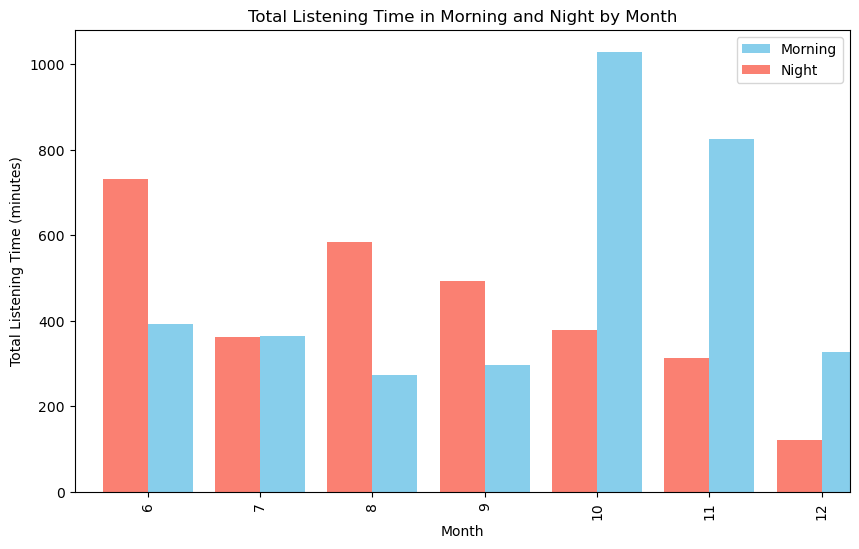

In [175]:
import matplotlib.pyplot as plt

# Extract month from 'endTime'
df['month'] = df['endTime'].dt.month

# Group by month and time of day, calculate the average listening time in minutes
avg_listen_time = df.groupby(['month', 'timeOfDay'])['msPlayed'].sum() / (1000 * 60)

# Unstack the 'timeOfDay' index to make separate columns for 'Morning' and 'Night'
avg_listen_time = avg_listen_time.unstack()

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
avg_listen_time['Morning'].plot(kind='bar', ax=ax, color='skyblue', position=0, width=0.4, label='Morning')
avg_listen_time['Night'].plot(kind='bar', ax=ax, color='salmon', position=1, width=0.4, label='Night')
ax.set_ylabel('Total Listening Time (minutes)')
ax.set_xlabel('Month')
ax.set_title('Total Listening Time in Morning and Night by Month')
ax.legend()

# Display the plot
plt.show()


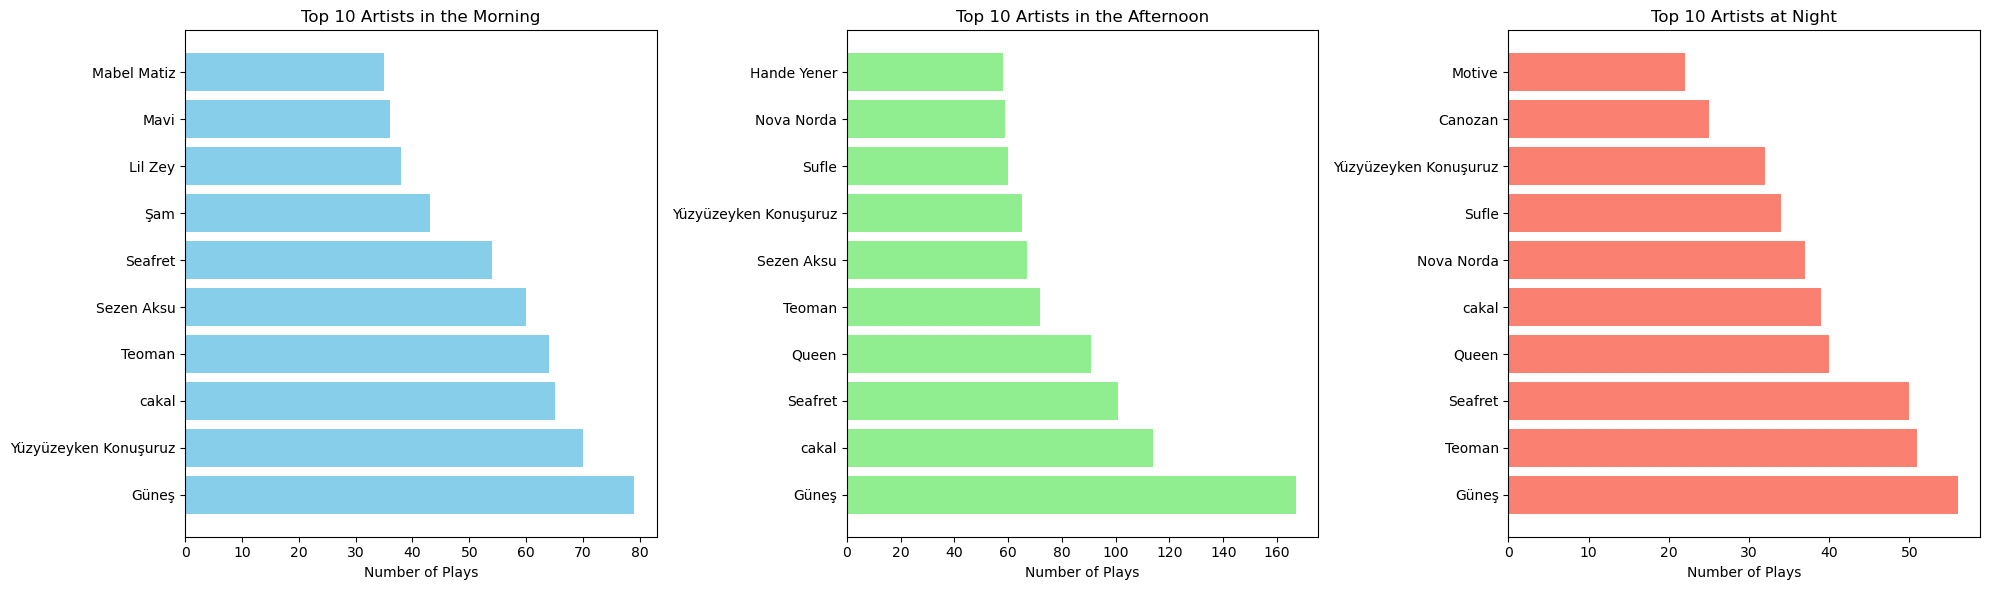

In [153]:
import matplotlib.pyplot as plt

morning_data = df[df['timeOfDay'] == 'Morning']
afternoon_data = df[df['timeOfDay'] == 'Afternoon']
night_data = df[df['timeOfDay'] == 'Night']

# Get the top 10 artists in the morning, afternoon, and night
top_morning_artists = morning_data['artistName'].value_counts().head(10)
top_afternoon_artists = afternoon_data['artistName'].value_counts().head(10)
top_night_artists = night_data['artistName'].value_counts().head(10)

# Plot the results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Top 10 artists in the morning
ax1.barh(top_morning_artists.index, top_morning_artists.values, color='skyblue')
ax1.set_title('Top 10 Artists in the Morning')
ax1.set_xlabel('Number of Plays')

# Top 10 artists in the afternoon
ax2.barh(top_afternoon_artists.index, top_afternoon_artists.values, color='lightgreen')
ax2.set_title('Top 10 Artists in the Afternoon')
ax2.set_xlabel('Number of Plays')

# Top 10 artists at night
ax3.barh(top_night_artists.index, top_night_artists.values, color='darkgreen')
ax3.set_title('Top 10 Artists at Night')
ax3.set_xlabel('Number of Plays')

plt.tight_layout()
plt.show()


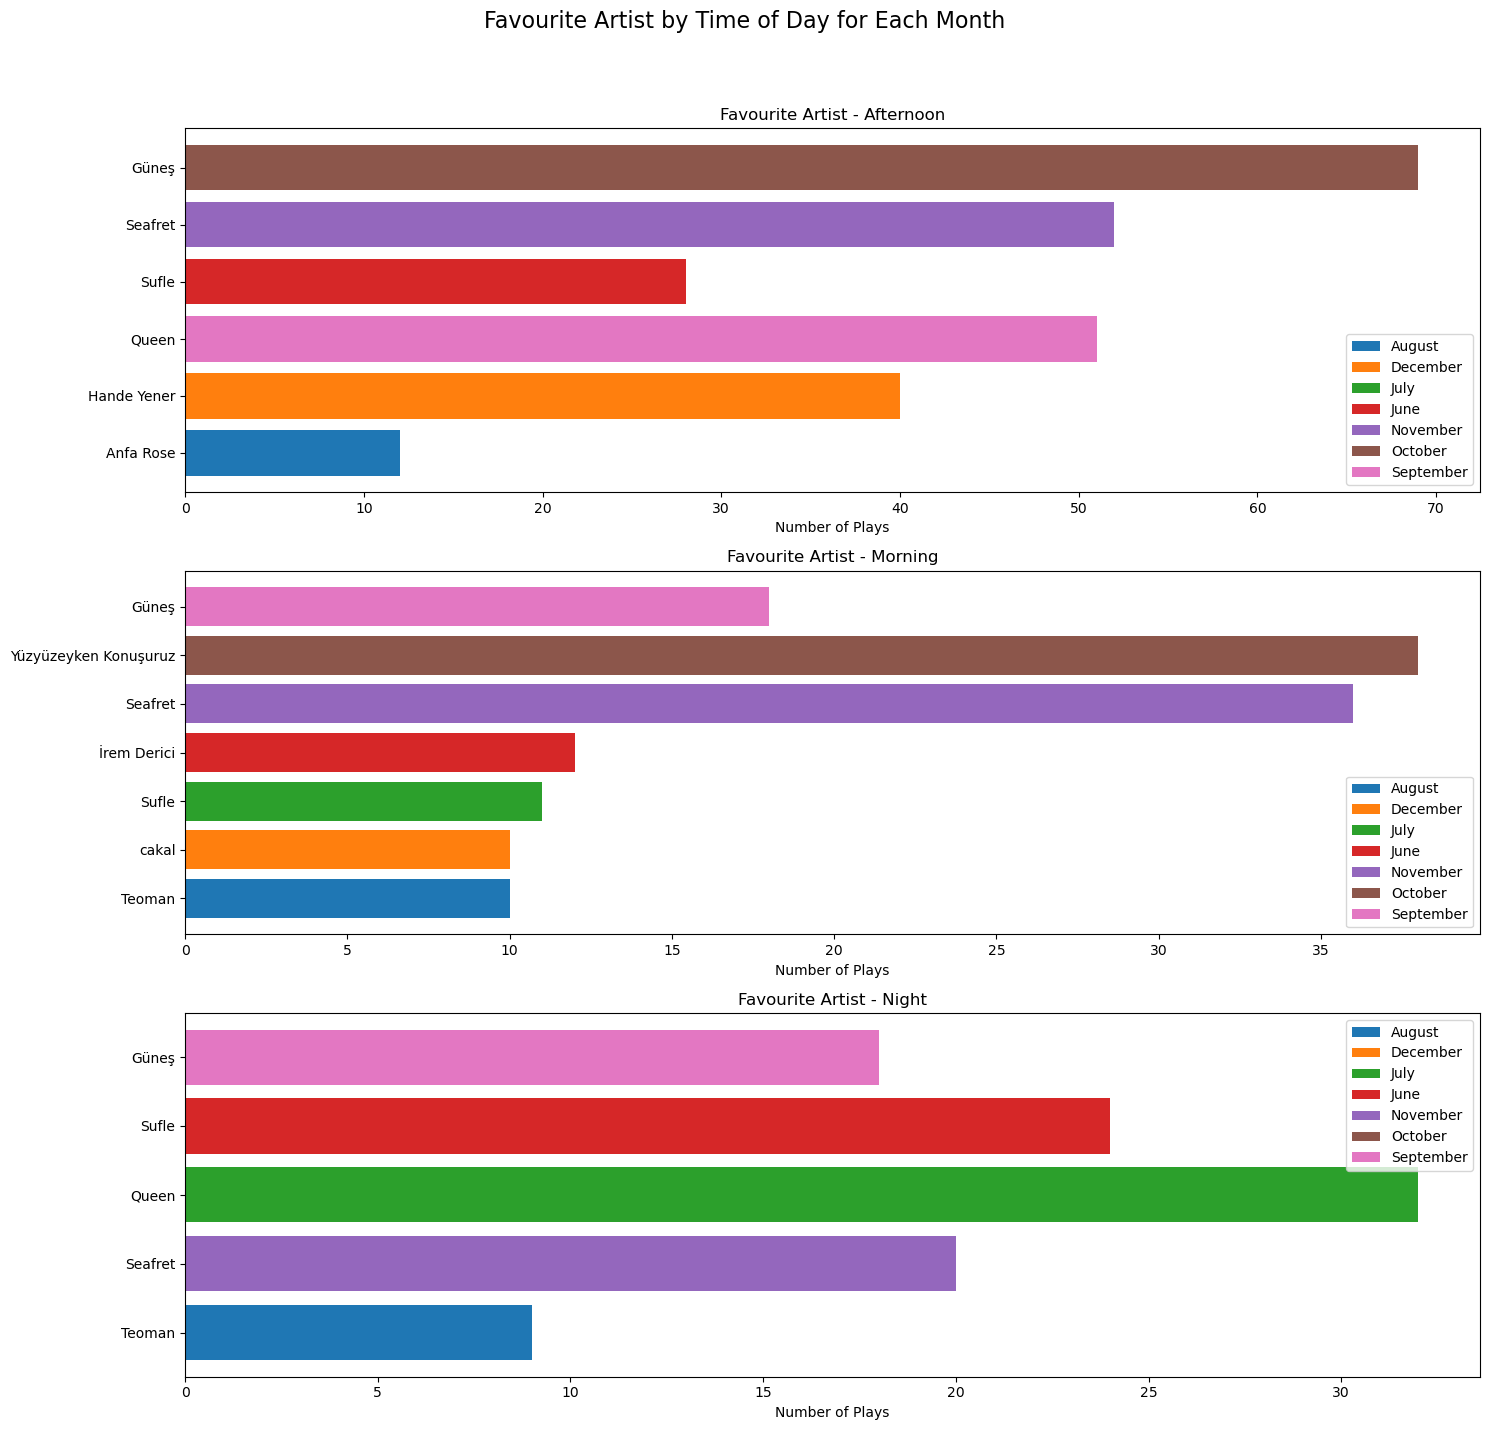

In [155]:
import matplotlib.pyplot as plt

df['endTime'] = pd.to_datetime(df['endTime'])
df['month'] = df['endTime'].dt.month_name()

# Get the top 1 artist for each time of day and each month
top_artists_by_time_and_month = df.groupby(['timeOfDay', 'month', 'artistName']).size().reset_index(name='count')
top_artists_by_time_and_month = top_artists_by_time_and_month.sort_values(by='count', ascending=False)

# Plot the results
fig, axes = plt.subplots(3, figsize=(15, 15))
fig.suptitle('Favourite Artist by Time of Day for Each Month', fontsize=16)

for i, (time_of_day, group) in enumerate(top_artists_by_time_and_month.groupby('timeOfDay')):
    ax = axes[i]

    # Top 1 artist for each month in the specified time of day
    for month, month_group in group.groupby('month'):
        top_artists = month_group.head(1)
        ax.barh(top_artists['artistName'], top_artists['count'], label=month)

    ax.set_title(f'Favourite Artist - {time_of_day}')
    ax.set_xlabel('Number of Plays')
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


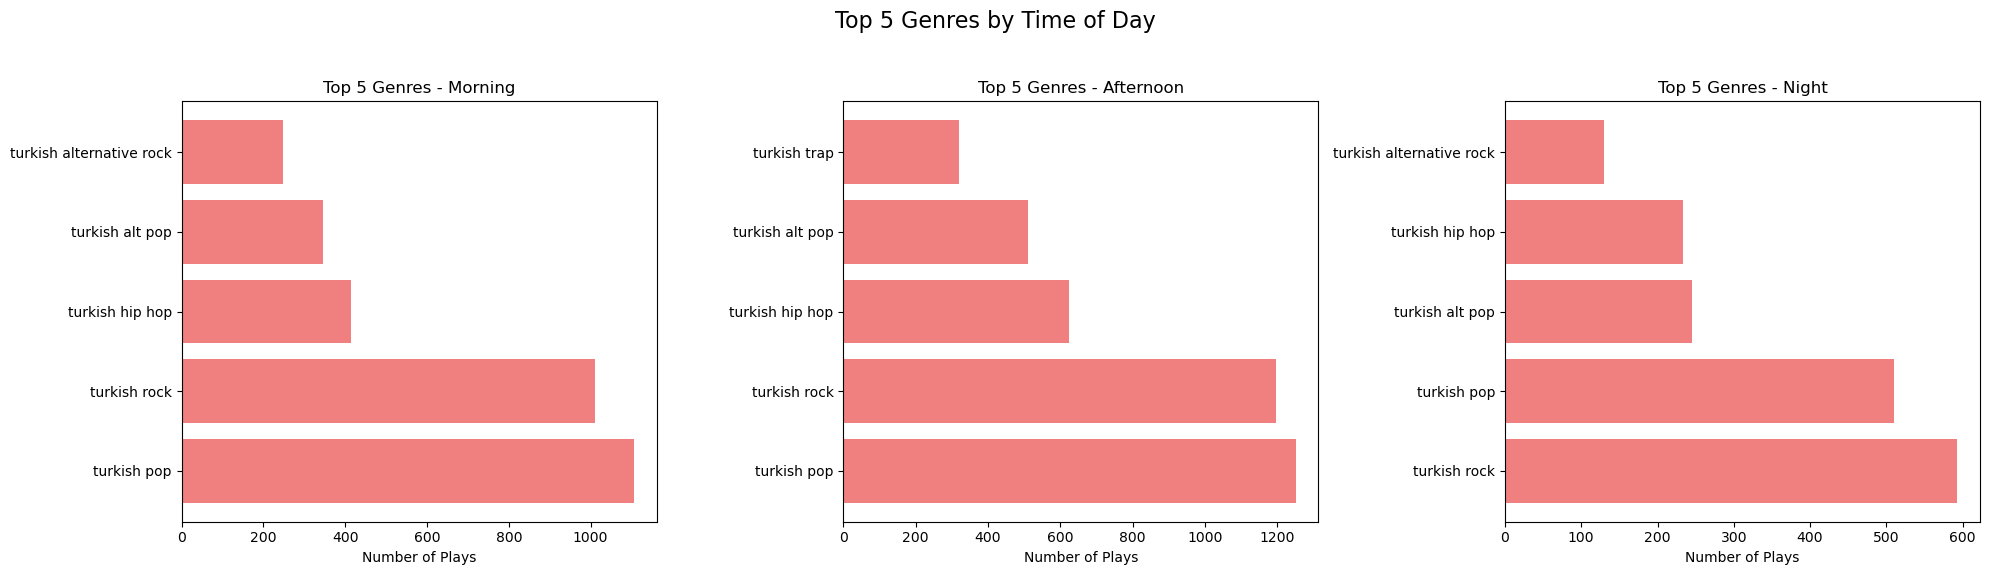

In [133]:
import matplotlib.pyplot as plt
import pandas as pd


# Get the top 10 genres for each time of day
top_genres_by_time = {}

for time_of_day in ['Morning', 'Afternoon', 'Night']:
    time_data = df[df['timeOfDay'] == time_of_day]
    genres_list = [genre for artist in time_data['artistName'] for genre in artist_genres_dict.get(artist, [])]
    top_genres = pd.Series(genres_list).value_counts().head(5)
    top_genres_by_time[time_of_day] = top_genres

# Plot the results
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Top 5 Genres by Time of Day', fontsize=16)

for i, (time_of_day, top_genres) in enumerate(top_genres_by_time.items()):
    ax = axes[i]

    ax.barh(top_genres.index, top_genres.values, color='darkgreen')
    ax.set_title(f'Top 5 Genres - {time_of_day}')
    ax.set_xlabel('Number of Plays')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [103]:
# Convert 'msPlayed' to minutes
df['minutesPlayed'] = df['msPlayed'] / (1000 * 60)

# Extract month from 'endTime'
df['month'] = df['endTime'].dt.month

# Define the seasons (winter and summer)
winter_months = [10, 11, 12]
summer_months = [6, 7, 8]

# Create a new column 'season' based on the month
df['season'] = df['month'].apply(lambda x: 'Winter' if x in winter_months else 'Summer')

# Calculate total minutes played for each time of day and season
total_minutes_by_time_and_season = df.groupby(['season', 'timeOfDay'])['minutesPlayed'].sum()


# Compare and print the result for winter and summer
if total_minutes_by_time_and_season['Winter']['Morning'] > total_minutes_by_time_and_season['Winter']['Night']:
    print("In Winter, I listened more in the Morning.")
elif total_minutes_by_time_and_season['Winter']['Morning'] < total_minutes_by_time_and_season['Winter']['Night']:
    print("In Winter, I listened more at Night.")
else:
    print("In Winter, I listened the same amount in the Morning and at Night.")

if total_minutes_by_time_and_season['Summer']['Morning'] > total_minutes_by_time_and_season['Summer']['Night']:
    print("In Summer, I listened more in the Morning.")
elif total_minutes_by_time_and_season['Summer']['Morning'] < total_minutes_by_time_and_season['Summer']['Night']:
    print("In Summer, I listened more at Night.")
else:
    print("In Summer, I listened the same amount in the Morning and at Night.")



In Winter, I listened more in the Morning.
In Summer, I listened more at Night.


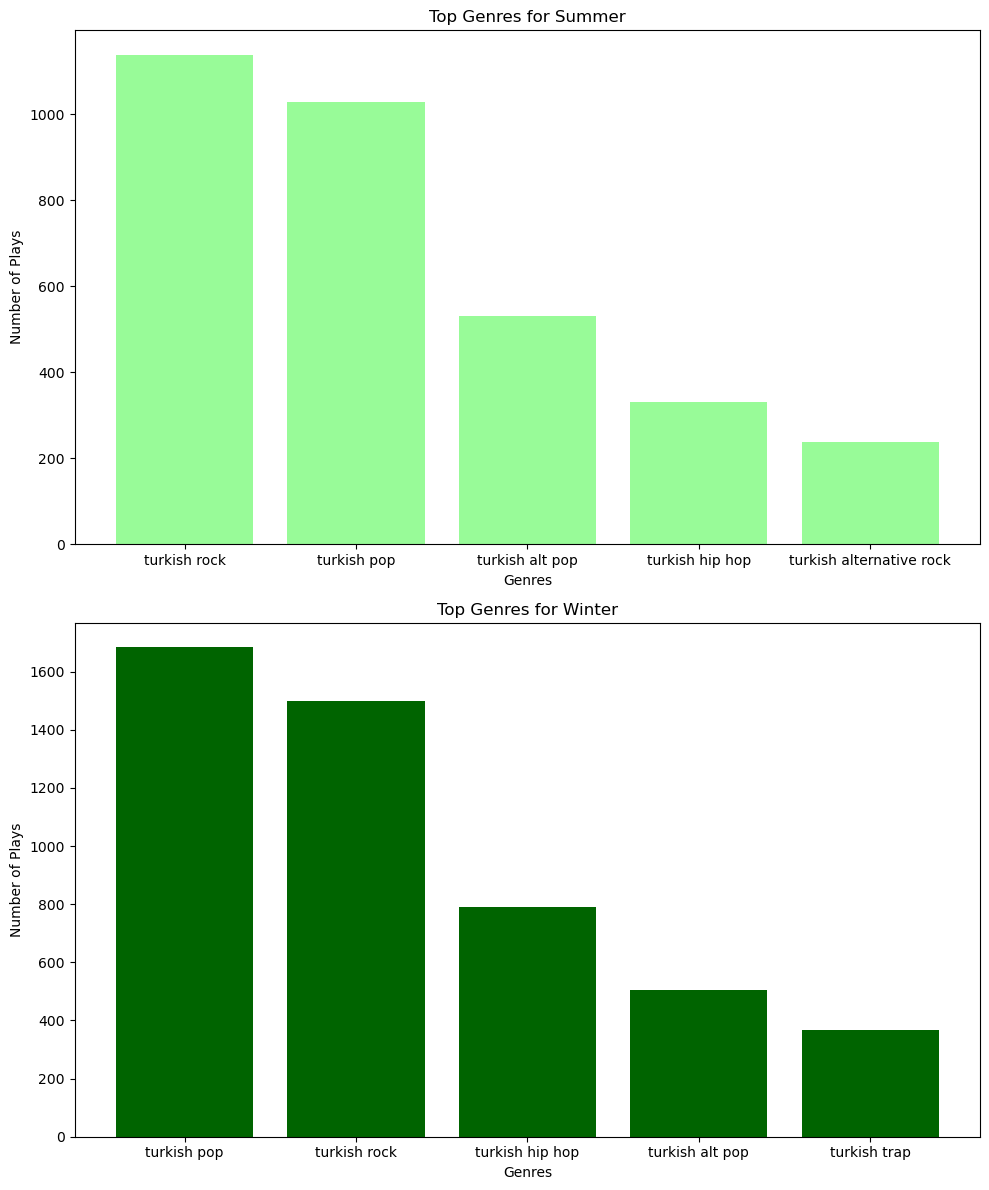

In [165]:
import pandas as pd
import matplotlib.pyplot as plt

df['endTime'] = pd.to_datetime(df['endTime'])
df['month'] = df['endTime'].dt.month

# Filter data for summer months (June, July, August)
summer_df = df[df['month'].isin([6, 7, 8])]

# Filter data for winter months (October, November, December)
winter_df = df[df['month'].isin([10, 11, 12])]

# Get the top genres for summer
summer_top_genres = summer_df['artistName'].apply(lambda artist: pd.Series(artist_genres_dict.get(artist, []))).stack().value_counts().head(5)

# Get the top genres for winter
winter_top_genres = winter_df['artistName'].apply(lambda artist: pd.Series(artist_genres_dict.get(artist, []))).stack().value_counts().head(5)

# Plot the results
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Plot for summer
axes[0].bar(summer_top_genres.index, summer_top_genres.values, color='palegreen')
axes[0].set_title('Top Genres for Summer')
axes[0].set_xlabel('Genres')
axes[0].set_ylabel('Number of Plays')

# Plot for winter
axes[1].bar(winter_top_genres.index, winter_top_genres.values, color='darkgreen')
axes[1].set_title('Top Genres for Winter')
axes[1].set_xlabel('Genres')
axes[1].set_ylabel('Number of Plays')

plt.tight_layout()
plt.show()


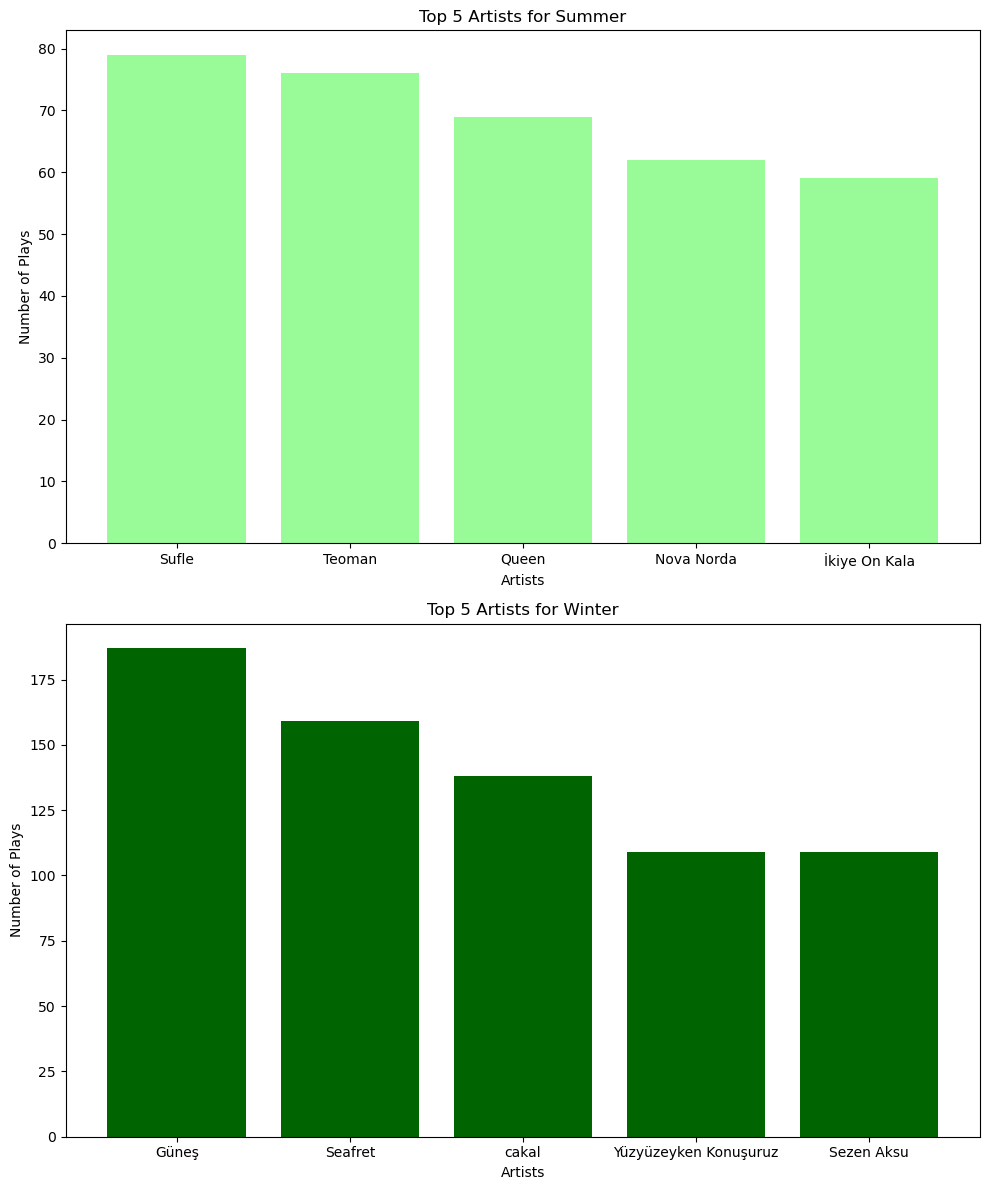

In [174]:
import pandas as pd
import matplotlib.pyplot as plt

df['endTime'] = pd.to_datetime(df['endTime'])
df['month'] = df['endTime'].dt.month

# Filter data for summer months (June, July, August)
summer_df = df[df['month'].isin([6, 7, 8])]

# Filter data for winter months (October, November, December)
winter_df = df[df['month'].isin([10, 11, 12])]

# Get the top 5 artists for summer
summer_top_artists = summer_df['artistName'].value_counts().head(5)

# Get the top 5 artists for winter
winter_top_artists = winter_df['artistName'].value_counts().head(5)

# Plot the results
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Plot for summer
axes[0].bar(summer_top_artists.index, summer_top_artists.values, color='palegreen')
axes[0].set_title('Top 5 Artists for Summer')
axes[0].set_xlabel('Artists')
axes[0].set_ylabel('Number of Plays')

# Plot for winter
axes[1].bar(winter_top_artists.index, winter_top_artists.values, color='darkgreen')
axes[1].set_title('Top 5 Artists for Winter')
axes[1].set_xlabel('Artists')
axes[1].set_ylabel('Number of Plays')

plt.tight_layout()
plt.show()


In [137]:
from datetime import datetime, timedelta

# Define the end date (19th January)
end_date = datetime(2023, 1, 19)

# Define the months to consider (October, November, December)
months_to_consider = [10, 11, 12]

# Initialize a list to store all Tuesdays
all_tuesdays = []

# Loop through each month
for month in months_to_consider:
    # Calculate the start date based on the month and end date
    start_date = datetime(end_date.year, month, 1)

    # Calculate the number of days in the month
    days_in_month = (start_date.replace(month=start_date.month % 12 + 1, day=1) - timedelta(days=1)).day

    # Calculate the end date for the month
    end_date_month = start_date + timedelta(days=days_in_month - 1)

    # Loop through each Tuesday in the month
    current_date = end_date_month
    while current_date >= start_date:
        # Check if the current day is a Tuesday
        if current_date.weekday() == 1:  # Monday is 0, Sunday is 6
            all_tuesdays.append(current_date)

        # Move 7 days back
        current_date -= timedelta(days=7)



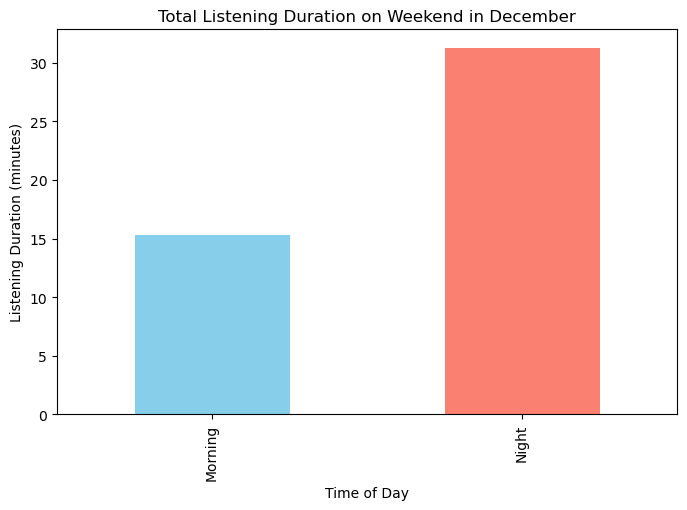

In [161]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'endTime' to datetime
df['endTime'] = pd.to_datetime(df['endTime'])

# Extract the day of the week and time of day
df['dayOfWeek'] = df['endTime'].dt.dayofweek
df['timeOfDay'] = pd.Categorical(df['timeOfDay'], categories=['Morning', 'Night'], ordered=True)

# Filter for Tuesdays in the 12th month
december_tuesday_df = df[(df['dayOfWeek'] ==5 ) & (df['endTime'].dt.month == 10)]


# Group by time of day and calculate the total listening duration in minutes
listening_duration = december_tuesday_df.groupby('timeOfDay')['msPlayed'].sum() / (1000 * 60)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 5))
listening_duration.plot(kind='bar', ax=ax, color=['skyblue', 'darkgreen'])
ax.set_ylabel('Listening Duration (minutes)')
ax.set_xlabel('Time of Day')
ax.set_title('Total Listening Duration on Weekend in December')

# Display the plot
plt.show()


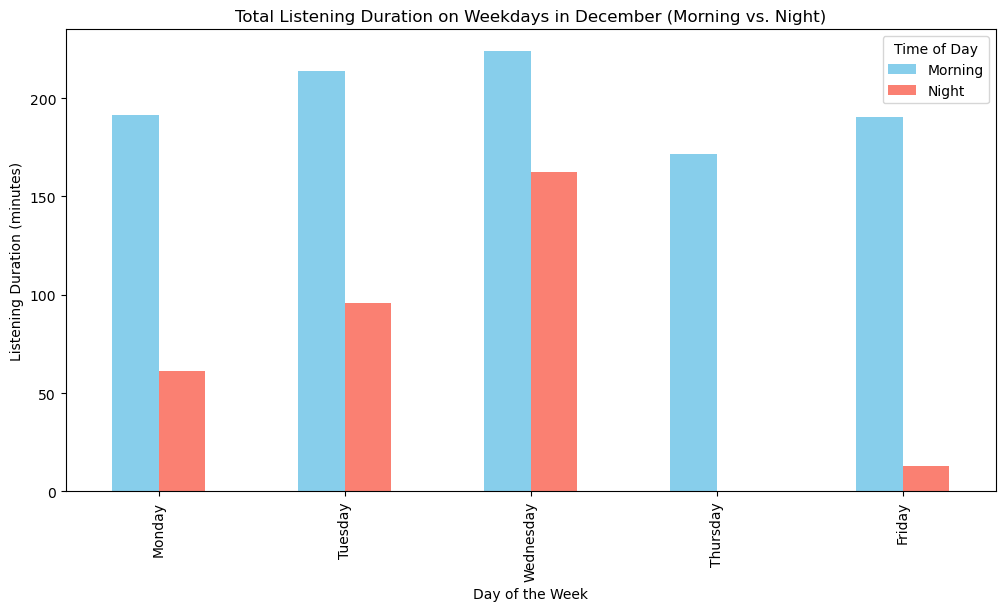

In [141]:
import pandas as pd
import matplotlib.pyplot as plt



# Convert 'endTime' to datetime
df['endTime'] = pd.to_datetime(df['endTime'])

# Extract the day of the week and time of day
df['dayOfWeek'] = df['endTime'].dt.dayofweek
df['timeOfDay'] = pd.Categorical(df['timeOfDay'], categories=['Morning', 'Night'], ordered=True)

# Filter for weekdays in the 12th month
december_weekday_df = df[(df['dayOfWeek'] < 5) & (df['endTime'].dt.month == 10)]

# Group by day of the week and time of day, then calculate the total listening duration in minutes
listening_duration = december_weekday_df.groupby(['dayOfWeek', 'timeOfDay'])['msPlayed'].sum() / (1000 * 60)

# Unstack the 'timeOfDay' index to make separate columns for 'Morning' and 'Night'
listening_duration = listening_duration.unstack()

# Plot the results
fig, ax = plt.subplots(figsize=(12, 6))
listening_duration.plot(kind='bar', ax=ax, color=['skyblue', 'darkgreen'])
ax.set_ylabel('Listening Duration (minutes)')
ax.set_xlabel('Day of the Week')
ax.set_title('Total Listening Duration on Weekdays in December (Morning vs. Night)')
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
ax.legend(title='Time of Day')

# Display the plot
plt.show()


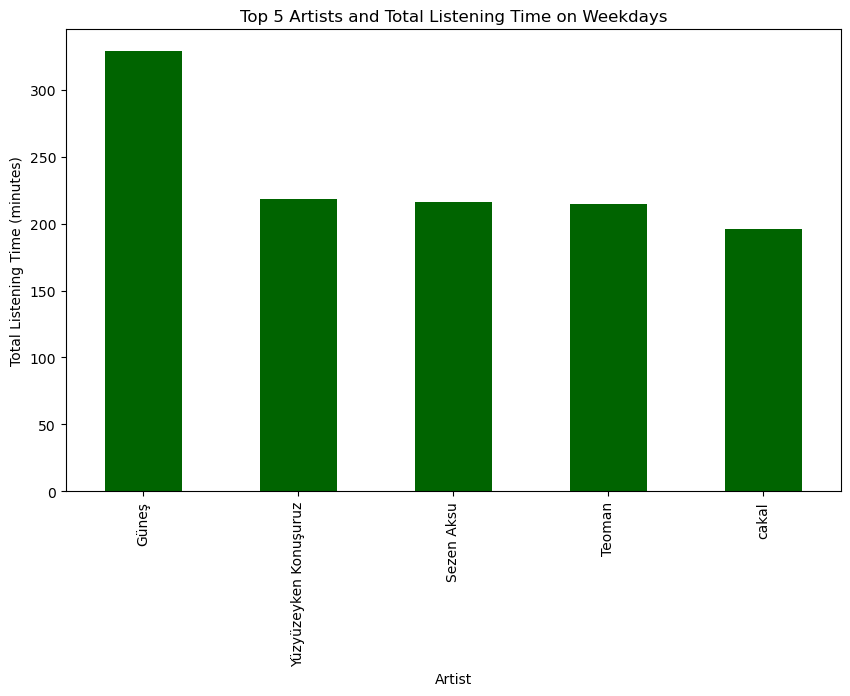

In [169]:
import matplotlib.pyplot as plt


# Extract the day of the week and time of day
df['dayOfWeek'] = df['endTime'].dt.dayofweek
df['timeOfDay'] = pd.Categorical(df['timeOfDay'], categories=['Morning', 'Night'], ordered=True)

# Filter for weekdays (Monday to Friday)
weekday_df = df[df['dayOfWeek'] < 5]

# Group by artist and calculate the total listening time
total_duration = weekday_df.groupby('artistName')['msPlayed'].sum() / (1000 * 60)

# Get the top 5 artists based on total listening time
top_artists = total_duration.nlargest(5)

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
top_artists.plot(kind='bar', ax=ax, color='darkgreen')
ax.set_ylabel('Total Listening Time (minutes)')
ax.set_xlabel('Artist')
ax.set_title('Top 5 Artists and Total Listening Time on Weekdays')
plt.show()


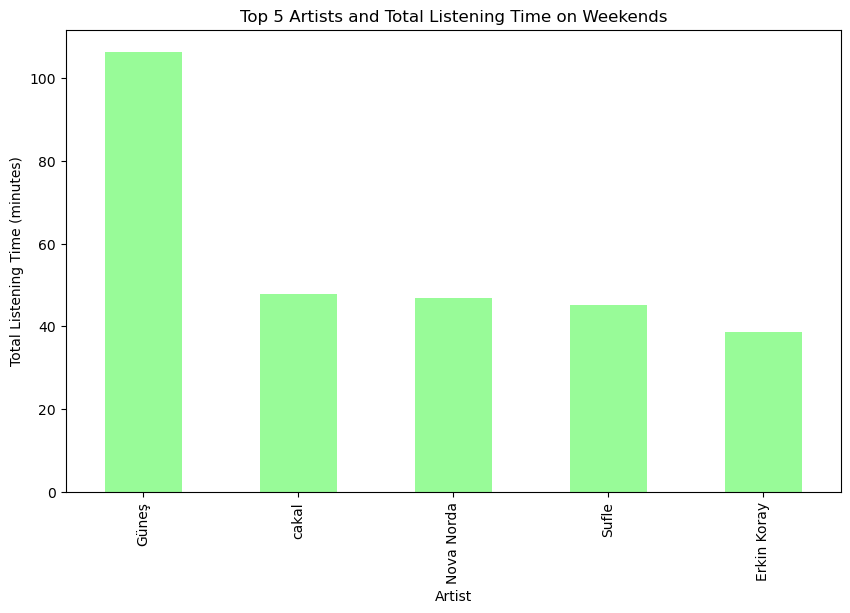

In [168]:
import matplotlib.pyplot as plt


# Extract the day of the week and time of day
df['dayOfWeek'] = df['endTime'].dt.dayofweek
df['timeOfDay'] = pd.Categorical(df['timeOfDay'], categories=['Morning', 'Night'], ordered=True)

# Filter for weekends (Saturday and Sunday)
weekend_df = df[df['dayOfWeek'] >= 5]

# Group by artist and calculate the total listening time
total_duration_weekend = weekend_df.groupby('artistName')['msPlayed'].sum() / (1000 * 60)

# Get the top 5 artists based on total listening time on weekends
top_artists_weekend = total_duration_weekend.nlargest(5)

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
top_artists_weekend.plot(kind='bar', ax=ax, color='palegreen')
ax.set_ylabel('Total Listening Time (minutes)')
ax.set_xlabel('Artist')
ax.set_title('Top 5 Artists and Total Listening Time on Weekends')
plt.show()
